In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(360, 360)


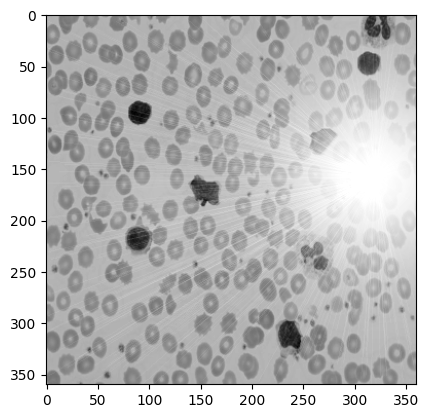

In [5]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/cell-bright.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
plt.imshow(gimg, cmap='gray')

In [36]:
N = 10


dimh = np.int32(gimg.shape[0]/N)
dimw = np.int32(gimg.shape[1]/N)

dh_rest = np.int32(gimg.shape[0]%N)
dw_rest = np.int32(gimg.shape[1]%N)

meanimg = np.zeros((N,N))
outimg = np.zeros((gimg.shape[0], gimg.shape[1]))

In [37]:
def mean_function(img, dimh, dimw, h, w):
  count = 1
  sum = 0
  avg= 0

  for y  in range(h,  h+dimh):
    for x in range(w, w+dimw):
      sum = sum + img[y,x]
      count = count + 1

    avg = np.int32(sum/count)
    return avg

In [38]:
for h in range(0, gimg.shape[0]-dh_rest, dimh):
  for w in range(0, gimg.shape[1]-dw_rest, dimw):
    meanimg[np.int32(h/dimh), np.int32(w/dimw)] = mean_function(gimg, dimh, dimw, h, w)

(10, 10)


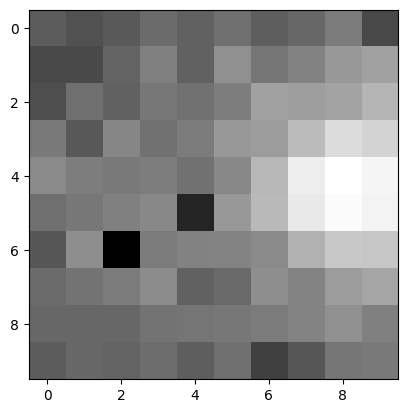

In [39]:
cv2_imshow(meanimg)
plt.imshow(meanimg, cmap='gray')
print(meanimg.shape)

In [40]:
for h in range(0, gimg.shape[0]-dh_rest):
  for w in range(0, gimg.shape[1]-dw_rest):
    if(gimg[h,w] > meanimg[np.int32(h/dimh), np.int32(w/dimw)]):
     outimg[h,w]=255
    else:
      outimg[h,w] = 0

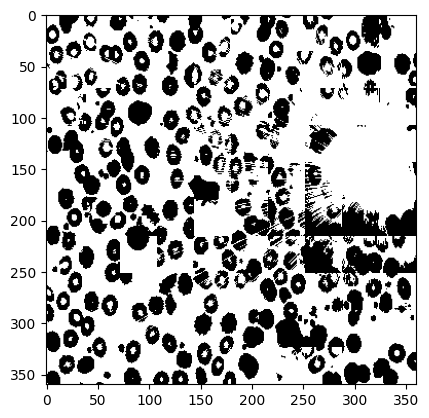

In [41]:
plt.imshow(outimg, cmap='gray')